<a href="https://colab.research.google.com/github/MrSimple07/MachineLearning_Practice/blob/main/ML_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to a curated set of interview questions that you may encounter in your future interviews. These questions have been sourced from various reputable outlets and are designed to assess your knowledge and understanding across different domains.

These interview questions cover a range of topics, including programming, data science, machine learning, and general problem-solving. Going through these questions and practicing your responses can help you prepare for the challenges that may arise during your interviews.

Feel free to use this resource as a self-assessment tool, and take the opportunity to deepen your understanding of key concepts in your field. Good luck with your interview preparations!

---

*Note: It's essential to understand that the actual questions in interviews may vary, and the goal is not to memorize answers but to build a solid foundation and demonstrate problem-solving skills.*

# Mixed questions

**1. What is Multilayer Perceptron (MLP) and Boltzmann Machine?**
*   MLP - one input, more hidden layers and one output
* Feedforward Architecture. Information flows the network in one direction
* MLPs are widely used for various tasks, including classification, regression, and pattern recognition.

---


  - Boltzman Machine is a simplified version of the MLP.
  - 2 layer model with a visible input layer and a hidden layer which makes stocastic decision
  - Boltzmann Machines and RBMs have been applied to various tasks, including dimensionality reduction, collaborative filtering, and feature learning.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)



prob = model.predict(X_test)

y_pred = np.argmax(prob)

# Evaluate the performance
print("Predicted Classes for New Data:", y_pred)



Epoch 1/50
3/3 - 2s - loss: 1.3126 - accuracy: 0.3333 - val_loss: 1.1770 - val_accuracy: 0.3333 - 2s/epoch - 690ms/step
Epoch 2/50
3/3 - 0s - loss: 1.2410 - accuracy: 0.3542 - val_loss: 1.1230 - val_accuracy: 0.3333 - 133ms/epoch - 44ms/step
Epoch 3/50
3/3 - 0s - loss: 1.1756 - accuracy: 0.4062 - val_loss: 1.0703 - val_accuracy: 0.4583 - 114ms/epoch - 38ms/step
Epoch 4/50
3/3 - 0s - loss: 1.1094 - accuracy: 0.4062 - val_loss: 1.0205 - val_accuracy: 0.5417 - 125ms/epoch - 42ms/step
Epoch 5/50
3/3 - 0s - loss: 1.0472 - accuracy: 0.4167 - val_loss: 0.9738 - val_accuracy: 0.5417 - 259ms/epoch - 86ms/step
Epoch 6/50
3/3 - 0s - loss: 0.9937 - accuracy: 0.4583 - val_loss: 0.9293 - val_accuracy: 0.6667 - 74ms/epoch - 25ms/step
Epoch 7/50
3/3 - 0s - loss: 0.9403 - accuracy: 0.6562 - val_loss: 0.8886 - val_accuracy: 0.8333 - 89ms/epoch - 30ms/step
Epoch 8/50
3/3 - 0s - loss: 0.8908 - accuracy: 0.7708 - val_loss: 0.8507 - val_accuracy: 0.8750 - 90ms/epoch - 30ms/step
Epoch 9/50
3/3 - 0s - loss: 0

**2. How can we relate standard deviation and variance?**
- Standard Deviation = square root of Variance
- St. deviation refers to the spread of the data from the mean.
- Variance is the average degree of all data points

In [ ]:
import numpy as np

data =np.array([1,3,5,7,4,3,2])

variance= np.var(data)
std_deviation = np.sqrt(variance)

print(variance)
print(std_deviation)

3.3877551020408165
1.8405855323893037


**3. The Empiric Rule: 68- 95-99.7 or the three-sigma rule**
1. About 68% of the data falls within one standard deviation from the mean.

2. About 95% of the data falls within two standard deviations from the mean.

3. About 99.7% of the data falls within three standard deviations from the mean.

These rules are useful for understanding the distribution of data and identifying potential outliers. They are based on the assumption of a normal distribution.

**4. Is a high variance in data good or bad? And how to handle it?**
- Higher variance means the data spread is big and the features has a variety of data. It is usually bad.
- To handle high variance we can use, bagging algorithm
- Bagging algorithm splits the data intosubgroups with sampling replicated from random data
- Also, using Regularization (L1, L2), Cross-Validation, Feature Engineering, Ensemble methods can be used for handling

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples =200, n_features =1, noise =10)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

alpha = 1 #Regularization strength

ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))



107.8532696410056


**5. Finding MSE using GridSearchCV (code)**

In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = [0.1, 0.5, 0.8, 1]

ridge_model = Ridge()
param_grid = {'alpha': alphas}

gr_search = GridSearchCV(ridge_model, param_grid, cv =5, scoring = 'neg_mean_squared_error')
gr_search.fit(X_train, y_train)

best_alpha = gr_search.best_params_['alpha']

best_ridge_model = Ridge(alpha = best_alpha).fit(X_train, y_train)

y_pred_best = best_ridge_model.predict(X_test)

print(mean_squared_error(y_test, y_pred_best))



108.37213936746555


**6. What is a Box-Cox transformation?**
- Box-Cox transformation is a power transform which transforms non-normal dependent variables into normal variables as normality is the most common assumption made while using many statistical techniques. It has a lambda parameter which when set to 0 implies that this transform is equivalent to log-transform. It is used for variance stabilization and also to normalize the distribution.
- It is used from scipy.stats

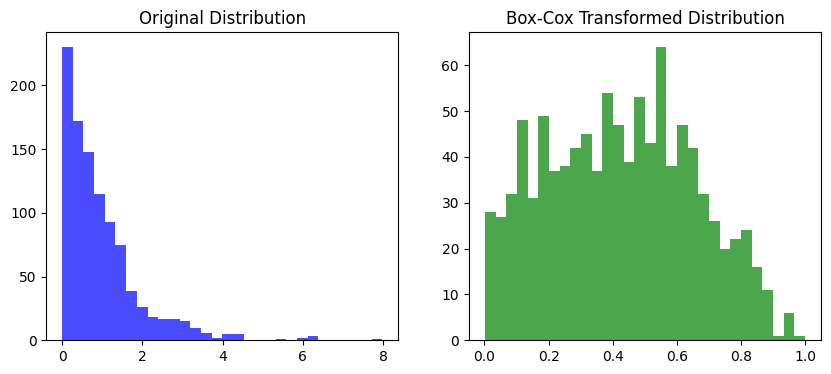

Optimal lambda value: -0.843751338053347


In [ ]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

data = np.random.exponential(size=1000)

# Apply the Box-Cox transformation
transformed_data, lambda_value = boxcox(data + 1)  # Adding 1 to handle zero or negative values

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', alpha=0.7)
plt.title('Box-Cox Transformed Distribution')

plt.show()

# Print the estimated lambda value
print("Optimal lambda value:", lambda_value)


**7. How Will You Know Which Machine Learning Algorithm to Choose for Your Classification Problem?**

There is no strict rule, but these guidelines we can use:
- If accuracy is concern, test different algorithms and cross validation
- If training data is small, use models with low variance and high bias
- If training data is large, high variance, low bias


**8. When do you use Classification over Regression?**
- When the target is caterogical (yes/no, estimating gender, type of color)
- Both of them belong to supervised machine learning algorithms
- When the target is continous: estimating sales and prices of a product, predicting the score of a team.

- We can use sklearn datasets to check (make_classification for classification, make_regression for regression)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

X,y = make_classification(n_samples=10)

a,b = make_regression(n_samples = 10)

print(y)
print(b)

[1 1 1 0 0 0 0 0 1 1]
[  47.03321534  220.52449793  326.83346596 -195.32292231  -39.27618741
   55.64461199 -104.14368427  -32.15874667  -25.25736559   76.96244146]


**9. Can You mention some advantages and disadvantages of Decision Trees?**
- advantages: easy to interpret, robust to outliers, few parameters to tune
- disadvantages: prone to overfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

**10. Explain the differences between Random Forest and Gradient Boosting machines**

- Random Forest (RF): RF is an ensemble method based on bagging. It builds multiple decision trees independently and combines their predictions through averaging (for regression) or voting (for classification).
- Gradient Boosting Machines (GBM): GBM, on the other hand, is an ensemble method based on boosting. It builds decision trees sequentially, with each tree correcting the errors of the previous one.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X,y = make_regression(n_samples = 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Random Forest Mean Squared Error: 11222.670286372868
Gradient Boosting Mean Squared Error: 14745.410304234038


**11. What is a Fourier Transform?**
- It is mathematical technique that transforms any function of time to a function of frequency.
- It is closely related to Fourier Series. It takes any time-based pattern for input and calculates the overall cycle offset, rotation speed and strength for all possible cycles.
- It is commonly used in Engineering, signal processing, image analysis

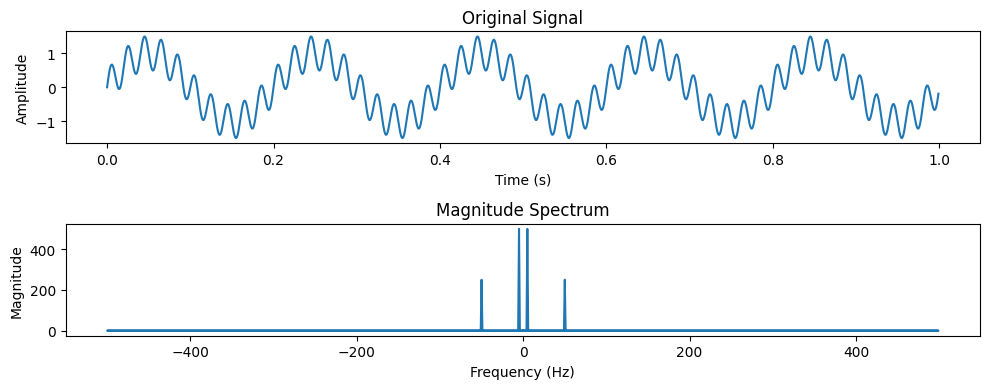

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
f1 = 5  # Frequency of the first sinusoid
f2 = 50  # Frequency of the second sinusoid
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Compute the Fourier Transform
freq = np.fft.fftfreq(len(signal), 1/fs)
fft_result = np.fft.fft(signal)

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


**12. Explain the Curse of Dimensionality?**
- It refers when the data has too many features
- If we have more features than observations, we have a risk of overfitting the model.
- When we have too many features, observations become harder to cluster. Too many dimensions cause every observation in the dataset to appear equidistant from all others and no meaningful clusters can be formed.

**13. What is Principle Component Analysis?**
- A technique that reduces the dimensionality of the dataset by reducing the number of variables that correlated with each other.
- The variables are transformed into a new set of variables that are known as Principal Components’. These PCs are the eigenvectors of a covariance matrix and therefore are orthogonal.


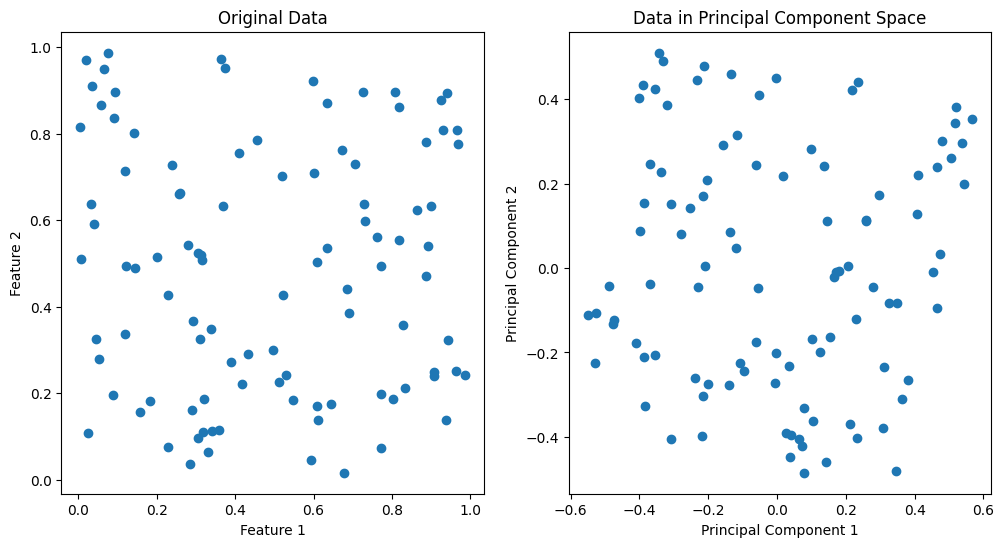

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
data = np.random.rand(100,2)

plt.figure(figsize = (12,6))
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(data)

plt.subplot(1,2,1)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(data[:,0], data[:,1])


plt.subplot(1,2,2)
plt.scatter(principal_components[:,0], principal_components[:,1])
plt.title('Data in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

**14. What is the Normal Distribution?**
- Also known, as the Gaussian Distribution or Bell curve
- Continuous probability distribution that is symmetric around its mean, meaning that the probability of an outcome decreases as it deviates from the mean in either direction
- The shape of the normal distribution characterized by its mean and standard deviation


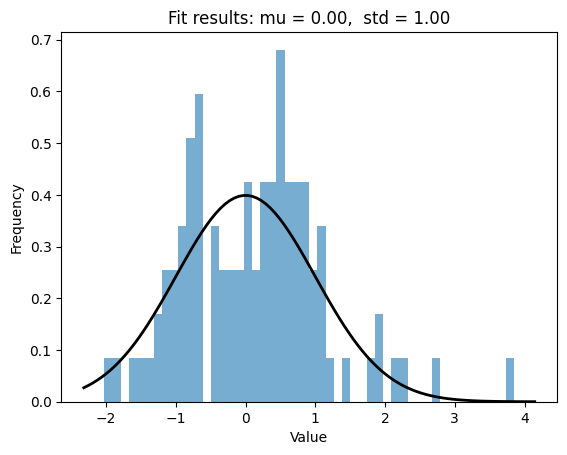

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Mean and St deviation
mu = 0
sigma = 1

data =np.random.normal(mu,sigma,100)

plt.hist(data, bins =50, density = True, alpha = 0.6)
xmin, xmax =plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, sigma))
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

**15. What is the difference between regularization and normalization?**
- Normalization adjusts the data
- Regularization adjusts the prediction function
- Regularization is concerned with controlling the complexity of a model to prevent overfitting, while normalization is focused on scaling and centering input features to ensure a stable and efficient learning process.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X,y = data, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standartize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Regularization using Ridge
ridge_model = Ridge(alpha = 0.6).fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f'Ridge Regression MSE: {ridge_mse}')

# Apply Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Regression MSE: {lasso_mse}')


Ridge Regression MSE: 27.40379063180332
Lasso Regression MSE: 27.384800174428836


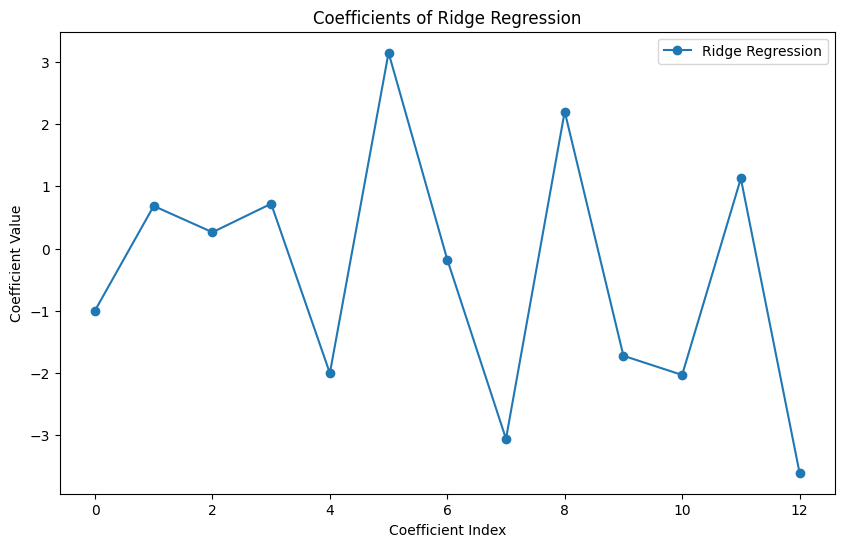

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ridge_model.coef_, marker='o', label='Ridge Regression')
plt.title('Coefficients of Ridge Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

**16. Explain the difference between Normalization and Standardization**
- The goal of normalization is to scale the values of the features to a specific range. Usually, [0,1]
- The goal of Standardization is to rescale the features so that they have a mean of 0 and a st. deviation of 1.
- Normalization is useful when all parameters need to have the identical positive scale however the outliers from the data set are lost. Hence, standardization is recommended for most applications.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Normalization using Min-Max scaling
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data)

print("Normalized Data:")
print(normalized_data)
print()

# Standardization using Z-score scaling
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data)

print("Standardized Data:")
print(standardized_data)

Normalized Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]

Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


**17. List the most popular distribution curves**
1. Uniform distribution is a probability distribution that has a constant probability. Rolling a single dice is one example because it has a fixed number of outcomes.
2. Binomial distribution is a probability with only two possible outcomes, the prefix ‘bi’ means two or twice. An example of this would be a coin toss. The outcome will either be heads or tails.
3. Normal distribution describes how the values of a variable are distributed. It is typically a symmetric distribution where most of the observations cluster around the central peak. The values further away from the mean taper off equally in both directions. An example would be the height of students in a classroom.
4. Poisson distribution helps predict the probability of certain events happening when you know how often that event has occurred. It can be used by businessmen to make forecasts about the number of customers on certain days and allows them to adjust supply according to the demand.
5. Exponential distribution is concerned with the amount of time until a specific event occurs. For example, how long a car battery would last, in months.

In [ ]:
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import norm

 **18. Kernel trick and popular Kernels in Support Vector Machines (SVM)**
- Kernel trick is a math function which when applied on data points, can find the region of classification between two different classes.
- Kernels: RBF, Linear, Sigmoid, Polynomial, Hyperbolic, Laplace and etc.





In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel ='rbf')

**19. How we can handle outliers?**
- We can find using box plot, scatter plot, Z-Score, IQR score
- Then by using some threshold we can remove outliers

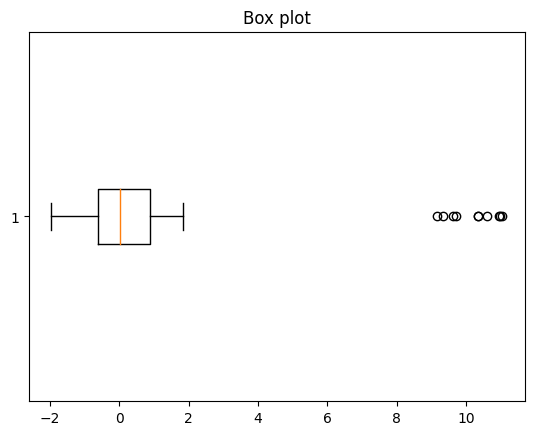

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

data = np.concatenate([np.random.normal(0, 1, 50), np.random.normal(10, 1, 10)])


plt.boxplot(data, vert = False)
plt.title('Box plot')
plt.show()


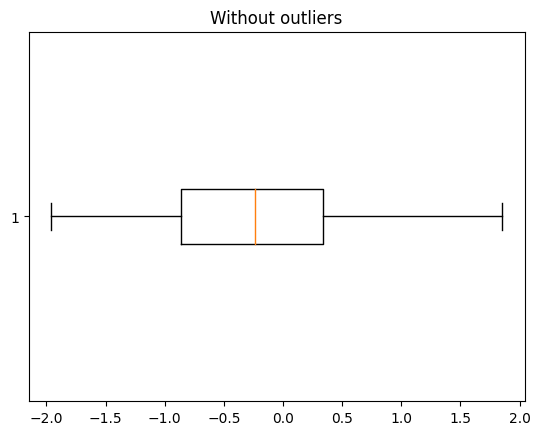

In [ ]:
#Set threshold to identify outliers
threshold = 5

outliers = np.abs(data - np.median(data)>threshold)
data_without_outliers = data[~outliers]

plt.boxplot(data_without_outliers, vert = False)
plt.title('Without outliers')
plt.show()

**20. Why boosting is a more stable algorithm as compared to other ensemble algorithms?**
- Boosting focuses on errors found in previous iterations un til they become obsolete
- In other hand, bagging has no this kind of loop.

**21. List of popular cross validation techniques?**
- K Fold, Stratified K fold
- Random Search CV, Grid Search CV
- Bootstrapping, Leave one out

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


np.random.seed(42)
X = np.random.rand(50, 10)
y = np.random.choice([0, 1], size=50)

n_iterations = 100

n_folds = 5

model = RandomForestClassifier()

cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

accuracy_scores = []

# Perform bootstrapped cross-validation
for _ in range(n_iterations):
    bootstrap_indices = np.random.choice(range(len(X)), size=len(X), replace=True)
    X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]

    for train_index, test_index in cv.split(X_bootstrap, y_bootstrap):
        X_train, X_test = X_bootstrap[train_index], X_bootstrap[test_index]
        y_train, y_test = y_bootstrap[train_index], y_bootstrap[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')


Mean Accuracy: 0.8180
Standard Deviation of Accuracy: 0.1188


**22. What is Bayes Theorem? State at least 1 use case with respect to the machine learning context? **
- Bayes' Theorem is a fundamental concept in probability theory that describes the probability of an event, based on prior knowledge of conditions that might be related to the event. The theorem is named after the Reverend Thomas Bayes, who introduced it in the 18th century.
- Spam email detection is using case

**23. What is Naive Bayes? Why is it Naive?**
- Naive Bayes classifiers are a series of classification algorithms that are based on the Bayes theorem. This family of algorithm shares a common principle which treats every pair of features independently while being classified.
- Naive Bayes is considered Naive because the attributes in it (for the class) is independent of others in the same class.  This lack of dependence between two attributes of the same class creates the quality of naiveness.
- Its simplicity and efficiency make it a popular choice for text classification and other tasks, especially when the independence assumption doesn't significantly impact the model's accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**24. Some Exploratory Data Analysis (EDA) techniques**
- Visualization (Univariate, Bivariate, Multivariate Visualization)
- Missing Value Treatment with mean/median
- Outlier detections - boxplot
- Transformation on the features
- Scaling the Dataset - Apply MinMax, Standard Scaler or Z Score Scaler
- Feature Engineering
- Dimensionality reduction - reduce the volume of data without losing much information

**25. Define Receiver Operating Characteristic (ROC) curve work**
- The graphical representation of the contrast between true positive rates and the false positive rate at various threshold is known as the ROC curve.
- TPR - True Positive Rate
- FPR - False Positive Rate

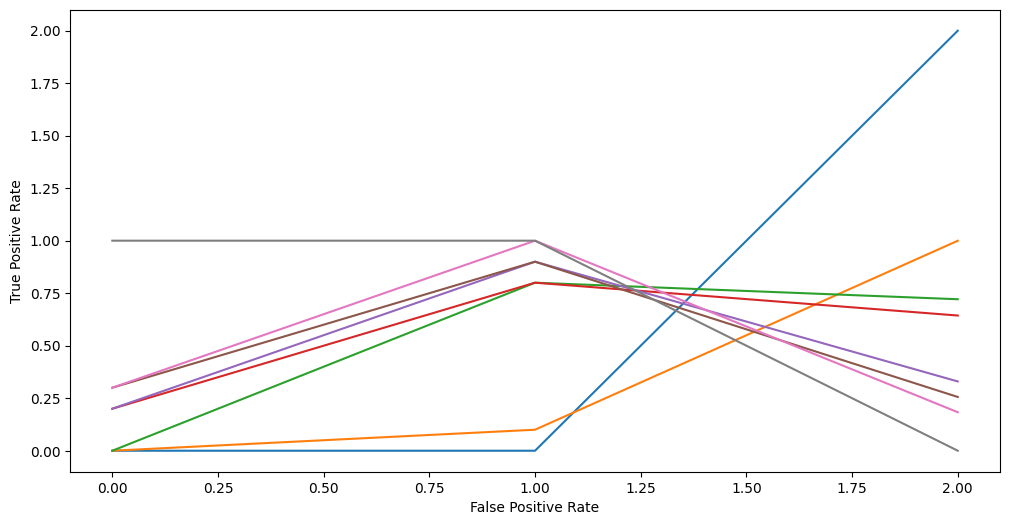

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples =100, n_features = 20)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred[:,1])

plt.figure(figsize =(12,6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(roc_curve(y_test, y_pred[:,1]))
plt.show()

**26. Main Hyperparameters of Catboost?**
- Learning rate
- Depth
- L2 Regularization - l2_leaf_reg
- min_data_in_leaf - from 2 to 6
- subsample

In [ ]:
!pip install catboost
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
import sklearn.metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into CatBoost Pool format
train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

# Define the CatBoost classifier
catboost_classifier = CatBoostClassifier()

param_grid = {
    'iterations': [100],
    'learning_rate': [0.01, 0.05],
    'depth': [3],
}

grid_search = GridSearchCV(
    estimator=catboost_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
)

grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy:.2f}')


0:	learn: 1.0860265	total: 2.52ms	remaining: 250ms
1:	learn: 1.0762590	total: 4.86ms	remaining: 238ms
2:	learn: 1.0650139	total: 5.3ms	remaining: 171ms
3:	learn: 1.0535870	total: 5.97ms	remaining: 143ms
4:	learn: 1.0422250	total: 6.45ms	remaining: 123ms
5:	learn: 1.0337573	total: 6.93ms	remaining: 109ms
6:	learn: 1.0241339	total: 7.43ms	remaining: 98.7ms
7:	learn: 1.0161879	total: 7.89ms	remaining: 90.8ms
8:	learn: 1.0072298	total: 8.36ms	remaining: 84.5ms
9:	learn: 0.9990684	total: 8.81ms	remaining: 79.3ms
10:	learn: 0.9901890	total: 9.19ms	remaining: 74.4ms
11:	learn: 0.9826483	total: 12ms	remaining: 88.4ms
12:	learn: 0.9748976	total: 12.6ms	remaining: 84.2ms
13:	learn: 0.9680044	total: 12.8ms	remaining: 78.6ms
14:	learn: 0.9598986	total: 13ms	remaining: 73.7ms
15:	learn: 0.9570170	total: 13.1ms	remaining: 69ms
16:	learn: 0.9484710	total: 13.3ms	remaining: 65.1ms
17:	learn: 0.9436196	total: 13.5ms	remaining: 61.7ms
18:	learn: 0.9352729	total: 13.7ms	remaining: 58.5ms
19:	learn: 0.930

**27. What is Optuna? ***
- Optuna is an open-source hyperparameter optimization framework in Python. It's designed to optimize the hyperparameters of machine learning models automatically, making it easier to find the best set of hyperparameters for improved model performance.

28. Different types of Clustering Algorithms
- KNN
- Kmeans
- Hierarchical clustering, Fuzzy Clustering

29. How will define the number of clusters in clustering algorithms?
- Using Silhoutte score and elbow method

30. What are the support vectors in SVM?
- Support Vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane.
- These are the points that help us build our SVM

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

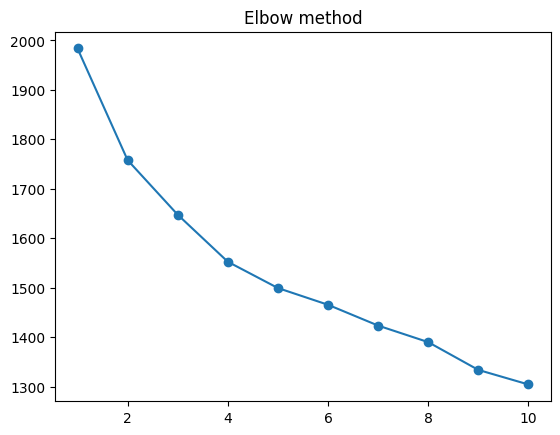

In [ ]:
#Using Elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

distortions = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

plt.plot(range(1,11), distortions, marker = 'o')
plt.title('Elbow method')
plt.show()

31. What is pruning in Decision Tree?
- Pruning is the process of reducing the size of a decision tree.
- The reason for pruning is that the trees prepared by the base algorithm can be prone to overfitting as they become incredibly large and complex

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import make_classification

# Sample data
X,y = make_classification(n_samples = 100, n_features = 20)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision tree with pruning parameters
# max_depth controls the maximum depth of the tree
# min_samples_split controls the minimum number of samples required to split an internal node
# min_samples_leaf controls the minimum number of samples required to be at a leaf node
# max_leaf_nodes controls the maximum number of leaf nodes
# ccp_alpha controls the complexity parameter for Minimal Cost-Complexity Pruning
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None, ccp_alpha=0.0)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8


32. What is the difference between treemap and heatmap
- Treemap:
- Displays hierarchical data as nested rectangles
- The size of each rectangle is proportional to a certain value associated with that branch

- Heatmap:
- Compares different categories with the help of colours and size

In [ ]:
#Tree map

import plotly.express as px

data = {
    'label': ['A', 'B', 'C', 'D', 'E'],
    'parent': ['', 'A', 'A', 'B', 'B'],
    'value': [10, 20, 15, 25, 30]
}

fig = px.treemap(data, path = ['parent', 'label'], values = 'value')
fig.show()

In [ ]:
# Heatmap
import plotly.express as px

# Sample data matrix
data_matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

fig = px.imshow(data_matrix, color_continuous_scale='Viridis')
fig.show()


33. XGB (eXtreme Gradient Boosting) model - working principle
- Ensemble learning method which builds a strong predictive model by combining the predictions of multiple weak models, typically decision trees
- 1. Build a weak model
- 2. Update Predictions
- 3. Regularization
- 4. Repeat. Repeat steps 2-4 for a predefined number of times or until a stopping criterion is met

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

model = xgb.XGBClassifier(objective = 'binary:logistic', random_state =42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.956140350877193


# Clustering

34. Explain the consept of hierarchical clustering
- Hierarchical clustering builds a hirarchy of clusters either from the bottom up or from the top down.
- It represents the clustering structure in a tree-like diagram called a dendrogram

In [ ]:
!pip install scipy

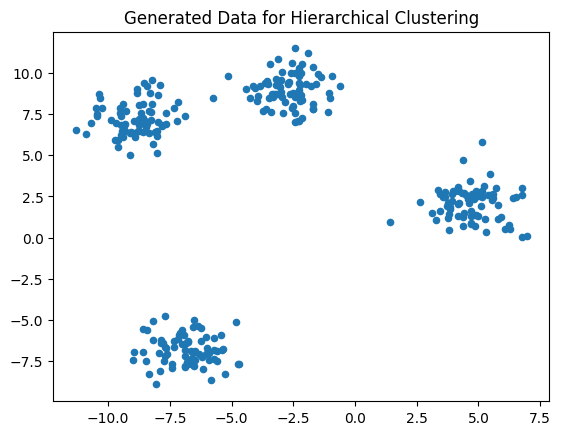

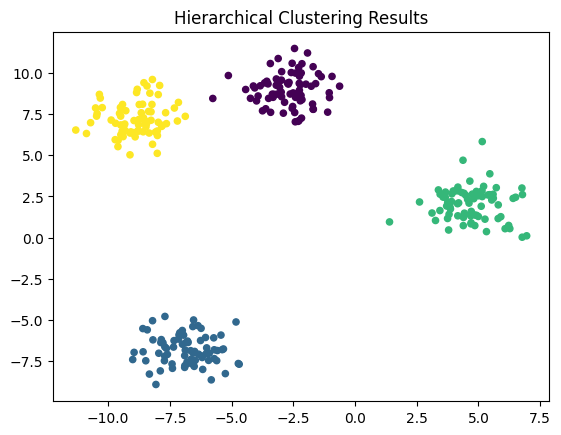

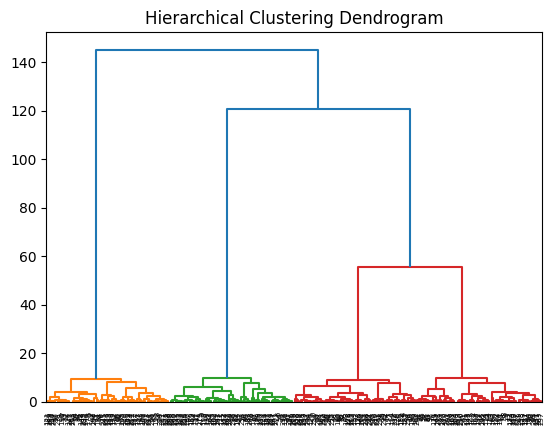

In [ ]:
#Agglomerative Clustering Algorithm

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Visualize the generated data
plt.scatter(data[:, 0], data[:, 1], s=20)
plt.title("Generated Data for Hierarchical Clustering")
plt.show()

# Hierarchical clustering using AgglomerativeClustering
# linkage: 'ward' minimizes the variance of clusters being merged
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = model.fit_predict(data)

# Visualize the hierarchical clustering results
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=20)
plt.title("Hierarchical Clustering Results")
plt.show()

# Plotting the dendrogram
linkage_matrix = linkage(data, "ward")
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

35. What is the DBSCAN and how does it work?
- DBSCAN is a density-based clustering algorithm that groups data points based on their density.
- It defines clusters as dense regions separated by sparser regions. It doesn't require specifying the number of clusters beforehand.

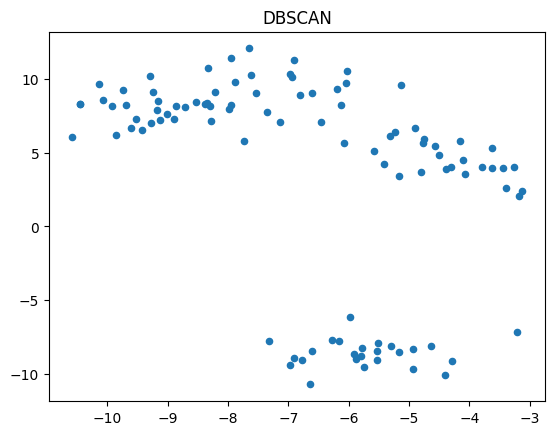

-0.22249263617730042


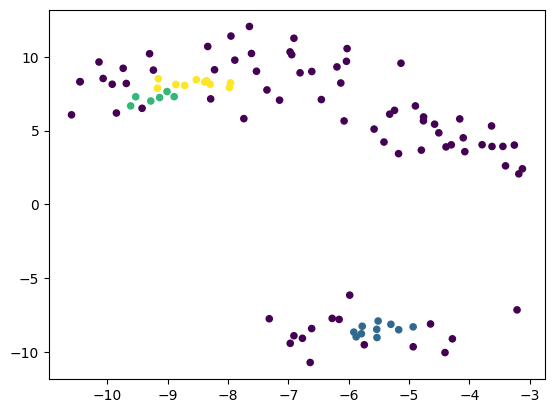

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

data, _ = make_blobs(n_samples = 100, centers =4)
plt.scatter(data[:,0], data[:,1], s= 20)
plt.title('DBSCAN')
plt.show()

#DBSCAN
model = DBSCAN(eps = 0.5, min_samples =5)
clusters = model.fit_predict(data)

print(silhouette_score(data, clusters))

plt.scatter(data[:,0], data[:,1], c = clusters, s =20, cmap = 'viridis')
plt.show()

36. How does the hierarchical clustering algorithm deal with outliers?
- In hierarchical clustering, outliers can be isolated in their own small clusters. The dendrogram allows for the identification of such outliers as individual branches

37. What are the pros and cons the hierarchical clustering compared to K-Means?

K-Means is a partitioning algorithm that assigns data points to clusters based on their centroids.

Pros: Ability to visualiza cluster hiearchies

Cons: Increased computational complexity

38. How can We visualize high-dimensional clustering results?
- using PCA or T-SNE
- Visuzalizing clusters on pairs of important features

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


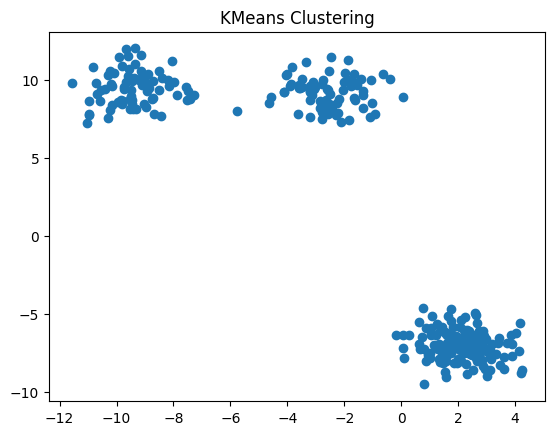

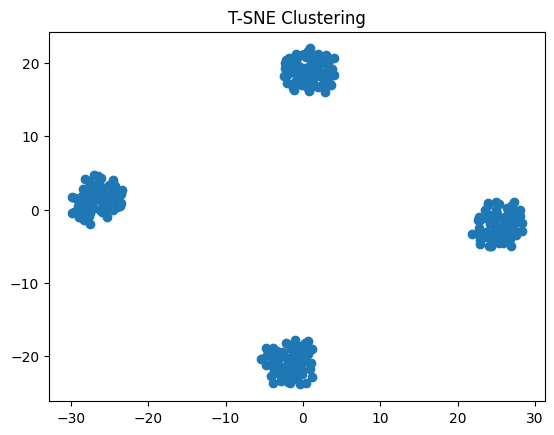

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_blobs


data, _ = make_blobs(n_samples =300, centers = 4, n_features =10, random_state =42)

kmeans = KMeans(n_clusters=4, random_state =42)
clusters = kmeans.fit_predict(data)

plt.scatter(data[:,0], data[:,1])
plt.title('KMeans Clustering')
plt.show()

#Applying T-SNE
tsne = TSNE(n_components = 2, random_state =42)
data_tsne = tsne.fit_transform(data)

plt.scatter(data_tsne[:,0], data_tsne[:,1])
plt.title('T-SNE Clustering')
plt.show()

39. Silhouette Score
- ranges from -1 to 1: [-1,1]
- Metric that provides information about the quality of clustering in a dataset
- +1 - High Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, clusters)
print(silhouette_avg)

0.7640363397590583


40. Soft and Hard Clustering

Soft Clustering:
- Aka, fuzzy clustering, each data point can belong to multiple clusters with varying degrees of membership
- The sum of membership scores all clusters for a given data point is equal to 1
- Fuzzy C-means (FCM) is an example of a soft clustering algorithm
- It is more flexible to capture the inherent uncertainty

Hard Clustering:
- Aka, crips clustering or exclusive clustering, each data point belongs to exactly one cluster
- The assignment in typically based on a proximity measure, suc as Euclidean distance or a similarity score
- It is easy to interpret, but it may struggle with datasets containing overlapping or noisy clusters
- K-Means is the most popular algorithm of hard clustering

41. What are the stopping criteria for K-means clustering?
- Reaching a maximum number of iterations
- Reaching maximum value of objective uncriont
- Meeting a minimum value of the objective function

42. What is the objective function?
- The objective function in K-means clustering is the withing-cluster sum of squares (WCSS), which measures the sum of the squares of the distances between each data point and its centroid.
- The algorithm aims to minimize the WCSS to form compact clusters

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
import warnings

warnings.filterwarnings('ignore')

data, _ = make_blobs(n_samples = 100)

def kmeans_objective(data, n_clusters):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)

    # Sum of squared distances to nearest centroid for each point
    distances = np.min(kmeans.transform(data), axis=1)

    # Return the sum of squared distances
    return np.sum(distances**2)

# Example usage:
num_clusters = 3
objective_value = kmeans_objective(data, num_clusters)
print(f"Objective Value for {num_clusters} clusters: {objective_value}")


Objective Value for 3 clusters: 164.28487074564873


#Decision Trees and Random Forest

43. Explain how a decision tree works.
- Decision tree recursively splits the datasets into subsets based on the most significant feature at each node.
- It continues this process until a stopping criterion is met

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

44. What is entropy and how is it used in the context of decision trees?
- Entropy is a measure of impurity in a set of data.
- Decision trees use entropy to calculate information gain, which helps in selecting the best feature to split the data at each node

45. What is the Gini index, and how is it different from entropy in decision trees?
- The Gini index meatures impurity similar to entropy but uses a different formula.
- It represents the probability of misclassifying a randomly chosen element and is commonly used in decision trees.

In [ ]:
#Entropy calculation
import numpy as np

def calculate_entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Example usage:
labels_example = [1, 1, 0, 1, 0, 0, 1, 0]
entropy_example = calculate_entropy(labels_example)
print(f'Entropy: {entropy_example}')


Entropy: 1.0


In [ ]:
#Gini index calculation
import numpy as np

def calculate_gini(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    gini_index = 1 - np.sum(probabilities**2)
    return gini_index

# Example usage:
labels_example = [1, 1, 0, 1, 0, 0, 1, 0]
gini_index_example = calculate_gini(labels_example)
print(f'Gini Index: {gini_index_example}')


Gini Index: 0.5


46. What is the difference between a decision tree and a rule-based system?
- Decision tree is a graphical representation of a decision-making process
- Rule based system uses a set of rules to make decisions

47. What are the advantages and disadvantages of Decision trees?

Adv:
- easy to understand
- require little data preprocessing
- handle both numerical and categorical data

disadv:
- Prone to overfitting
- Sensitive to noisy data

**Random Forests**

48. Random forest and Decision Tree
- Decision tree is a single decision tree to make predictions
- Random forest is multiple decision trees

49. Explain the consept of an Ensemble method. How does a Random Forest use ensemble learning?
- An ensemble method combines multiple models to improve overall performance.
- A Random Forest builds multiple decision trees and combines their predictions.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

50. What is bootstrapping? How is it used in the construction of individual trees within a Random Forest?
- Bootstrapping is creating multiple random subsets of the training data, allowing each tree in the RandomForest to be trained on a slightly different dataset

In [ ]:
import numpy as np

def bootstrap_sample(data, num_samples):
  indices = np.random.choice(len(data), size = num_samples, replace = True)
  bootstrapped_sample = data[indices]
  return bootstrapped_sample

original_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
bootstrapped_sample = bootstrap_sample(original_data, num_samples=5)


print(original_data)
print(bootstrapped_sample)

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  8 10  1  1]


51. What is the relationship between number of trees in Random forest and its performance?
- It definitely affects, the performance improves. But, after a certain point, may not significantly improve performance

1.0
1.0
1.0
1.0
1.0
1.0


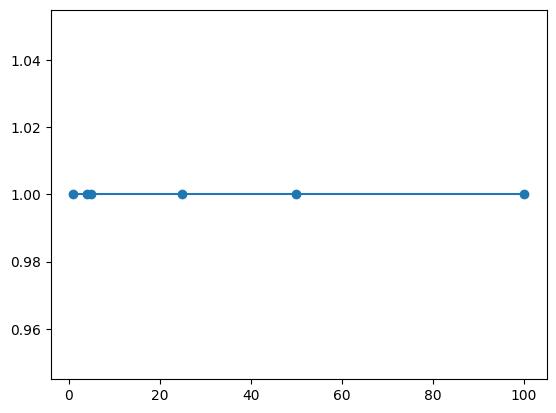

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

iris = load_iris()

X,y = iris.data, iris.target

num_trees = [1,4,5,25,50,100]
accuracy_scores = []

for i in num_trees:
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

  model = RandomForestClassifier(n_estimators = i)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)
  accuracy_scores.append(accuracy)

plt.plot(num_trees, accuracy_scores, marker = 'o')
plt.show()

52. In what scenarios would You prefer using a Random Forest over a single decision tree?
- Random forest is more useful when we work with high-dimensional data to avoid overfitting
- Robust model with good generalization is required

53. Explain the out-of-bag (OOB) error estimation in the context of Random Forests
- OOB error is an estimate of a Random Forest's performance on unseen data.
- It is calculated by evaluation each tree on the samples not used during its construction

#Ensemble Learning
54. Bagging (Bootstrap Aggregation) what is it? How it works?
- Bagging involves training multiple instances of the same base learning algorithm on different random subsets of the training data, sampled with replacement.
- The final prediction is by averaging (for regression) or voting (for classification)


In [ ]:
#Bagging

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_classifier = DecisionTreeClassifier(random_state=42)

# Bagging classifier with 10 base classifiers
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


55. Boosting what is it? How it works?
- Boosting builds a series of weak learners sequentially, with each new learner focusing on the mistakes of the previous ones.
- AdaBoost (Adaptive Boosting)
- Gradient Boosting machines (GBM): XGBoost, LightGBM and Catboost


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()

X,y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

base_classifier= DecisionTreeClassifier(max_depth =1)

model = AdaBoostClassifier(estimator = base_classifier, n_estimators = 20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

1.0


56. Stacking what is it? How it works?
- Stacking involves training multiple diverse models, and a meta-model is then trained to combine their predictions.
- The idea is to leverage the strengths of different models and create a more powerful learner.
- Stacking can be more complex, but it can achieve higher performance


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base models
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions using base models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Create a new feature matrix using base model predictions
stacked_features = np.column_stack((rf_predictions, gb_predictions))

# Meta-model (Logistic Regression in this example)
meta_model = LogisticRegression(random_state=42)

# Train the meta-model using the stacked features
meta_model.fit(stacked_features, y_test)

# Make predictions using the meta-model
rf_test_predictions = rf_model.predict(X_test)
gb_test_predictions = gb_model.predict(X_test)
stacked_test_features = np.column_stack((rf_test_predictions, gb_test_predictions))
stacked_predictions = meta_model.predict(stacked_test_features)

# Calculate accuracy
accuracy = accuracy_score(y_test, stacked_predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


57. Voting Classifiers (Regressors) what is it? How it works?
- A simple form of ensemble learning where multiple models are trained independently, and their predictions are combined by a majority vote (for classification) or averaging (for regression).
- It can be hard or soft voting depending on how the individual models' outputs are combined.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base models
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Hard Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('logistic_regression', lr_model)
], voting='hard')

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
voting_predictions = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, voting_predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


58.  Importance of Hyperparameter Tuning in Ensemble Learning?
- Preventing Overfitting
- Improving Accuracy
- Optimizing Model Diversity

59. Bagging vc Boosting


1. Bagging:
- High Variance Models. Decision trees with deep branches. It helps reduce overfitting
- Noisy Data
- Parallelization: Bagging can be easily parallelized, because all models are trained intependently

2. Boosting:
- Low Bias models
- Sequential Learning: Boosting works sequentially, and each learner corrects the errors of the previous ones.
- Imbalanced data: Boosting can handle imbalanced datasets effectively by assigning higher weights to misclassified instances.

60. Feature Importance in Random Forest
- Random Forests assign importance scores to features based on their contribution to reducing impurity or entropy in decision trees.
- Mean Decrease in Accuracy (MDA): Another metric used to calculate feature importance

Feature ranking:
Feature 3: 0.4339818709871682
Feature 2: 0.4173081338019912
Feature 0: 0.10410500706117767
Feature 1: 0.04460498814966301


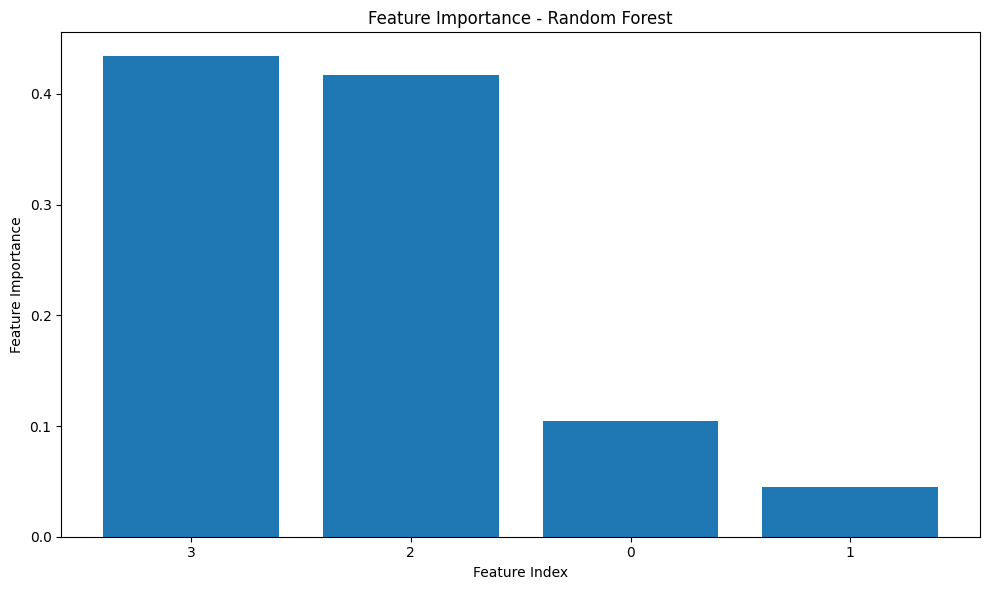

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"Feature {indices[f]}: {feature_importances[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()


61. Explain the concept of "stacking with cross-validation." How does it help prevent overfitting in stacking?
- Stacking with cross-validation is an extension of the stacking ensemble technique, incorporating cross-validation during the training of base models and the meta-model.
- The purpose is to reduce overfitting and obtain a more reliable estimate of the model's performance on unseen data.
- Avoids of Leakage of Information

# Evaluation Metrics
62. What is the difference between accuracy and precision? In what scenarios would you prioritize one over the other?
- Accuracy: (TP + TN)/ (TP + TN +FP + FN). Measures the overall correctness of predictions.
- Precision: TP/ (TP+ FP). Measures the accuracy of positive predictions.
- Prioritize precision when false positives are costly or undesirable

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

63. Sensivity (Recall)
- Measures the ability of a model to identify all relevant instances TP/(TP+FN)
- When capturing all positive instances is critical and the cost of missing positive instances is high

In [ ]:
from sklearn.metrics import recall_score

64. Trade-off between Precision-Recall
- The trade-off between precision and recall occurs when improving one usually comes at the expense of the other.
- Precision measures the percentage of predictions made by the model that are correct, while recall measures the percentage of relevant data points that were correctly identified by the model.
- In medical diagnostics, a high recall is often more important because it's better to identify all possible cases of a disease, even if it means having some false positives, than to miss any cases.
- In fraud detection, precision may be more important because it's better to avoid false positives and not accuse innocent people of fraud.



65. F1-score
- Harmonic mean of precision and recall 2*(Precision * Recall) / (Precision + Recall)
- Preferrable over accuracy when dealing with imbalanced classes

In [ ]:
from sklearn.metrics import f1_score

66. ROC Curve and AUC- ROC:
- ROC Curve: Graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate
- AUC-ROCL Area under the ROC curve, measures the model's ability to make accurate positive predictions

In [ ]:
from sklearn.metrics import roc_auc_score

67. Confusion matrix what is it?
- A table that summarizes the performance of a classification algorithm, showing TP, TN, FP, FN.
- Metrics we can calculate from the confusion matrix, accuracy, precision, recall, F1-score

In [ ]:
from sklearn.metrics import confusion_matrix

68. What kind of Metrics is used in Time Series Forecasting?
- Mean-Absolute-Error (MAE)
- Mean-Squared-Error (MSE)
- Root Mean Squared Error (RMSE) and others

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

y_actual = [1, 2, 3, 4, 5]
y_predicted = [1.6, 2.5, 2.9, 3, 4.1]

MSE = mean_squared_error(y_actual, y_predicted)

#root mean squared error
RMSE = sqrt(MSE)
print("Root Mean Square Error: ", RMSE)

Root Mean Square Error:  0.6971370023173351


69. Can you explain the concept of bias and variance in the context of model evaluation?
- Bias refers to the error introduced by making simplifying assumptions in a model, while variance refers to the error introduced by the model being sensitive to small fluctuations in the training data.
- Model evaluation helps in identifying the appropriate level of complexity for a model to avoid both overfitting and underfitting, which are related to bias and variance.

70. What is r2 score and how is it calculated for regression tasks?
- The R-squared ($R^2$) score is a statistical measure that provides information about the goodness of fit of a regression model.
- It is a value between 0 and 1 that represents the proportion of the variance in the dependent variable that is explained by the independent variables.

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

true_values = np.array([2, 3, 5, 7, 10])
predicted_values = np.array([1.8, 2.5, 4.8, 6.5, 9.7])

r_squared = r2_score(true_values, predicted_values)
print("R-squared:", r_squared)

R-squared: 0.9837378640776699


71. Cross-Entropy loss in Classification
- Also known as Log Loss, measures the performance of a classification model whose output is a probability value between 0 and 1.
- It is suitable for multi-class classification problems

# Deep Learning

72. What is deep learning in simple words?
- Deep learning is a subset of machine learning that involves training artificial neural networks to perform tasks without explicitly programming them for those tasks. It is inspired by the structure and functioning of the human brain, where interconnected neurons work together to process information.

- In simple words, deep learning uses layers of artificial neural networks to automatically learn and extract patterns from data. These networks consist of nodes (artificial neurons) arranged in layers, and information is passed through these layers to make predictions or decisions.

73. What are Neural Networks? Explain the basic structure and components of a neural networks.
- Neural Networks a fundamental component of Deel Learning, and they are inspired by the structure and functioning of the human brain
- Basic structure of neural networks:

1. Input layer: The input layer receives initial data
2. Hidden layers: Hidden layers process the input data using weights and activation functions
3. Output layers: The output layer produces final prediction or output
4. Weights and Biases
5. Activation Functions

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                192       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2338 (9.13 KB)
Trainable params: 2338 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


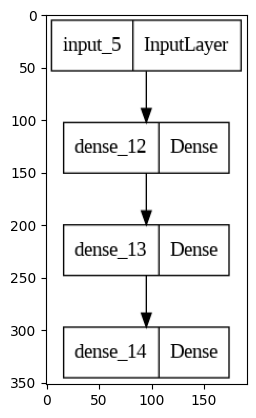

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#Define a simple neural network
model = models.Sequential()

#Input layer
model.add(layers.InputLayer(input_shape =(2,)))

#Hidden layers with activation functions
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))


#Output layer
model.add(layers.Dense(units = 2, activation = 'sigmoid'))

plot_model(model, to_file ='neural_network.png')

img = plt.imread('neural_network.png')
plt.imshow(img)
model.summary()

74. What is the purpose of an Activation Function in a Neural Network?
- The purpose of an activation function in a neural network is to introduce non-linearity into the model
- Without activation functions, the entire neural network would behave as a linear model, regardless of its depth and complexity.

Common Activation functions:
1. Sigmoid activation:
- Range(0,1)
- Commonly used in the output layer for binary classification problems, as it squashes the output between 0,1
2. Hyperbolic Tangent (Thanh) activation:
- Range(-1,1)
- Similar to the sigmoid function, but it has -1;1 range and it makes zero-centered
3. Rectified Linear Unit (ReLU) activation:
- Range [0, +∞)
- Widely used in hidden layers due to its simplicity and effectiveness. It introduces non-linearity by outputting zero for negative inputs and the input for positive inputs.
4. Leaky Rectified Linear Unit (Leaky ReLU) Activation Function:
- Introduces a small slope for negative values to prevent dead neurons (neurons that always output zero) in ReLU.
5. Softmax activation:
- Used in the output layer for multi-class classification problems to convert raw scores into probabilities

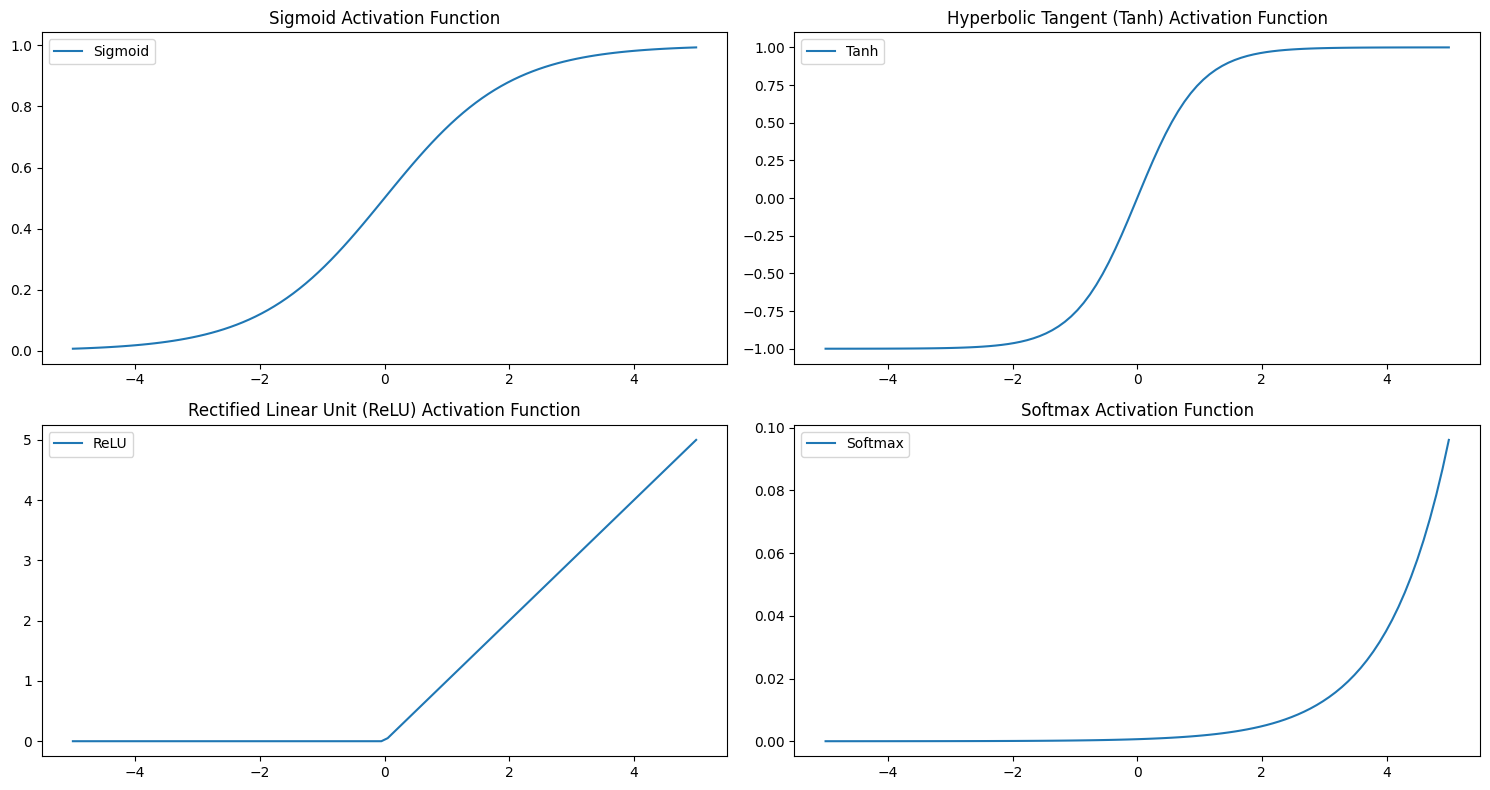

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hyperbolic Tangent (Tanh) Activation Function
def tanh(x):
    return np.tanh(x)

# Rectified Linear Unit (ReLU) Activation Function
def relu(x):
    return np.maximum(0, x)

# Softmax Activation Function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=0)


x_values = np.linspace(-5, 5, 100)

# Compute activation function values
sigmoid_values = sigmoid(x_values)
tanh_values = tanh(x_values)
relu_values = relu(x_values)
softmax_values = softmax(x_values)

# Plotting the activation functions
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(x_values, sigmoid_values, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_values, tanh_values, label='Tanh')
plt.title('Hyperbolic Tangent (Tanh) Activation Function')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_values, relu_values, label='ReLU')
plt.title('Rectified Linear Unit (ReLU) Activation Function')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_values, softmax_values, label='Softmax')
plt.title('Softmax Activation Function')
plt.legend()

plt.tight_layout()
plt.show()


75. Explain Backpropogation in simple words
- In simple words, backpropogation is like a feedback mechanism that guides the neural network to improve its predictions over time.
- If we break it down:

1. Feedforward and Prediction
- In a neural network, information is passed through layers of interconnected nodes (neurons).
- This is called feedforward. Input data goes through the network, and the network makes predictions or produces an output.
2. Comparison with Actual Output
- The output from the neural network is compared with the actual (desired) output.
- This comparison results in an error, which represents the difference between what the network predicted and what it should have predicted.
3. Backpropagation of Errors
- Backpropagation involves propagating this error backward through the network, layer by layer.
- The goal is to understand how much each neuron in the network contributed to the overall error.
4. Adjusting Weights
- As the error is propagated backward, the network adjusts the weights associated with each connection between neurons. This adjustment is performed to reduce the error in future predictions.
5. Gradient Descent
- Backpropagation is often coupled with an optimization algorithm like GD.
- This algorithm helps the network find the minimum of the error function by iteratively adjusting weights in the direction that reduces the error.


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input dataset (features)
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Output dataset (desired output)
outputs = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Set random seed for reproducibility
np.random.seed(42)

# Initialize weights with random values
input_layer_neurons = inputs.shape[1]
hidden_layer_neurons = 4
output_neurons = 1
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))

# Training the neural network using backpropagation
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = outputs - predicted_output

    # Backpropagation
    output_error = error * sigmoid_derivative(predicted_output)
    hidden_layer_error = output_error.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(output_error) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_error) * learning_rate

# Test the trained neural network
new_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
hidden_layer_output_test = sigmoid(np.dot(new_inputs, weights_input_hidden))
predicted_output_test = sigmoid(np.dot(hidden_layer_output_test, weights_hidden_output))

print("Predicted Output after Training:")
print(predicted_output_test)


Predicted Output after Training:
[[0.10124564]
 [0.92688977]
 [0.92005948]
 [0.05932789]]


76. What is Vanishing Gradient Problem?
- The vanishing gradient problem is a challenge that can occur during the training of deep neural networks, particularly those with many layers.
-  It is characterized by the gradients of the loss function with respect to the weights becoming very small as they are backpropagated through the network during training.

77. What is Transfer Learning? Name a few commonly used transfer learning models.
- Transfer learning is a machine learning technique where a model trained on one task is adapted and used for a second related task.
- Instead of training a model from scratch for a new task, transfer learning leverages knowledge gained from solving a different but related task.

Commonly used Transfer Learning models:
1. VGG16 vc VGG19
- VGG (Visual Geometry Group) models are deep convolutional neural networks (CNNs) with multiple layers.
- They were originally designed for image classification tasks and are often used as base models for transfer learning.
2. ResNet (Residual Network):
- ResNet is a deep neural network architecture designed to address the vanishing gradient problem.
- It introduces skip connections that allow gradients to flow more easily through the network.
- ResNet models are commonly used in transfer learning for various computer vision tasks.
3. Inception (GoogLeNet):
- The Inception architecture, also known as GoogLeNet, is designed to capture information at different scales using multiple filters.
- Image related tasks
4. MobileNet
- MobileNet is a lightweight deep learning architecture specifically designed for mobile and edge devices. It uses depthwise separable convolutions to reduce the number of parameters.
- It is used when it is limited computational resources
5. BERT (Bidirectional Encoder Representations from Transformers):
- BERT is a transformer-based model designed for natural language processing (NLP) tasks.
- It has been pre-trained on large amounts of text data and can be fine-tuned for various downstream NLP tasks, such as sentiment analysis, question answering, and named entity recognition.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


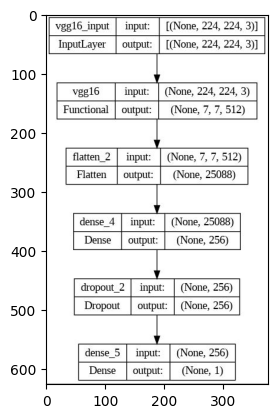

In [ ]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import plot_model
import matplotlib.pyplot as plt

base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

for layer in base_model.layers:
    layer.trainable = False


model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

plot_model(model, to_file='model.jpg', show_shapes = True)
img = plt.imread('model.jpg')
plt.imshow(img)



78. What are the Convolutional Neural Networks (CNN) used for?
- Convolutional Neural Networks (CNNs) are primarily used for computer vision tasks, where the input data is structured in the form of grids, such as images.
- CNNs are particularly effective in tasks that involve understanding and analyzing visual data.

1. Image Classification
2. Object Detection
3. Semantic Segmentation
4. Face Recognition
5. Medical Image Analysis
6. Video Analysis

79. What is Recurrent Neural Network (RNN)? Describe the architecture and use cases of recurrent neural networks.
- A Recurrent Neural Network (RNN) is a type of neural network designed for sequential data processing.
- Unlike traditional feedforward neural networks, RNNs have connections that form a directed cycle, allowing them to maintain a hidden state or memory across time steps. This makes RNNs well-suited for tasks involving sequential or time-dependent data.

Architecture of RNN:
1. Input Layer
2. Hidden Layer
3. Output layer

Use Cases:
1. Sequence Modeling:
- RNNs are well-suited for sequence modeling tasks, such as predicting the next element in a sequence, language modeling, and music generation.
2. Time Series Prediction:
- RNNs can be used for time series prediction tasks, including stock price forecasting, weather prediction, and energy consumption prediction.
3. NLP
- RNNs are commonly used in NLP tasks like text generation, machine translation, sentiment analysis, and named entity recognition.
4. Speech Recognition:
- RNNs can be applied to speech recognition tasks, where the input is a sequence of audio features, and the network is trained to transcribe spoken words.

In [ ]:
import numpy as np
import tensorflow as tf
from keras.layers import Dense, SimpleRNN
from keras.models import Sequential


np.random.seed(40)
seq_length =10
num_samples = 1000

X= np.random.random((num_samples, seq_length, 1))
y = np.sum(X, axis=1)

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(seq_length, 1), activation='relu'))
model.add(Dense(units = 1))

model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

new_sequence = np.random.random((1, seq_length, 1))


pred = model.predict(new_sequence)

print("Generated Sequence:")
print(new_sequence.squeeze())
print("Predicted Sum:")
print(pred.squeeze())

model.summary()

Epoch 1/10
25/25 [==============================] - 3s 26ms/step - loss: 25.4632 - val_loss: 23.2533
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 17.9215 - val_loss: 6.4681
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 1.5656 - val_loss: 0.6362
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.3558 - val_loss: 0.2614
Epoch 5/10
25/25 [==============================] - 0s 10ms/step - loss: 0.2682 - val_loss: 0.2385
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 0.2490 - val_loss: 0.2235
Epoch 7/10
25/25 [==============================] - 0s 10ms/step - loss: 0.2339 - val_loss: 0.2066
Epoch 8/10
25/25 [==============================] - 0s 16ms/step - loss: 0.2181 - val_loss: 0.1957
Epoch 9/10
25/25 [==============================] - 0s 9ms/step - loss: 0.2023 - val_loss: 0.1766
Epoch 10/10
1/1 [==============================] - 1s 692ms/step
Generated Sequence:
[0.24387152 0.69030296 0

80. Explain Regularization in Deep Learning
- Regularization is a set of techniques used in deep learning to prevent overfitting and improve the generalization performance of a model.

Types of Regularization:
1. L1 (Lasso) amd L2 (Ridge)
2. Elastic Net Regularization
3. Dropout
4. Weight Constraint

Benefits of Regularization:
1. Prevents Overfitting
2. Improves Robustness
3. Controls Model Complexity

81. What is Batch Normalization? Explain how batch normalization works and its benefits in training deep networks.
- Batch Normalization is a technique used in deep learning to normalize the inputs of each layer across a mini-batch.
- BatchNorm normalizes the inputs, leading to more stable and faster training of deep neural networks.

How BatchNorm works?
1. Normalization
- For each mini-batch during training, BatchNorm normalizes the input of a layer by subtracting the mean and dividing by the standard deviation of that mini-batch. This ensures that the activations have zero mean and unit variance.
2. Scaling and Shifting
- The normalized activations are then scaled and shifted using learnable parameters (gamma and beta). This allows the network to learn the optimal scaling and shifting for each layer.
3. Backpropogation:
- During backpropagation, the gradients are calculated with respect to the normalized inputs. The learnable parameters (gamma and beta) are updated during the optimization process.
4. Test time:
- During test time, BatchNorm uses the statistics (mean and standard deviation) computed during training on the entire dataset. This ensures consistency in normalization between training and inference.

82. What are Autoencoders? What are some of the uses of Autoencoders in Deep Learning?
- Autoencoders are a type of neural network architecture used for unsupervised learning.
- The main objective of an autoencoder is to learn a compressed, efficient representation of input data, often called a "code" or "latent space," and then reconstruct the input data from this representation.
- The architecture typically consists of an encoder, which maps the input to the latent space, and a decoder, which reconstructs the input from the latent space representation.

Compnonents of Autoencoders:
1. Encoder
2. Latent Space
3. Decoder

Uses of Autoencoders in  DL
1. Dimensionality Reduction
2. Data Denoising
3. Anomaly Detection
4. Image Generation
5. Representation Learning

83. What is the Role of Dropout in Neural Networks?
- Dropout is a regularization technique which aims preventing overfitting.

How it works?
1. Randomly Deactivating Neurons
2. Stochastic Training
3. Reducing Dependency on Specific Neurons
4. Implicit Averaging

84. What is the difference between Stochastic Gradient Descent (SGD) and Adam (Adaptive Momentum) Optimizer?
- Even though Adam converges faster, SGD generalizes better than Adam and thus results in improved final performance.

Momentum:
- SGD: Can incorporate momentum to help accelerate convergence by introducing a momentum term that accumulates a fraction of the past gradients.
- Adam: Utilizes the concept of momentum implicitly by incorporating a moving average of past gradients.

Memory: Requirement:
- SGD: Requires less memory compared to Adam, as it only needs to store the current parameter values and gradients.
- Adam: Involves additional memory to store the moving averages of gradients and squared gradients for each parameter.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X,y = make_classification(n_samples = 300, n_features = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(10, input_dim = 20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

sgd_optimizer = SGD(learning_rate = 0.01)
model.compile(optimizer = sgd_optimizer, loss = 'binary_crossentropy', metrics ='accuracy')

model.fit(X_train, y_train, epochs = 10, batch_size =32)


model.reset_states()


adam_optimizer = Adam(learning_rate = 0.01)
model.compile(optimizer = adam_optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

model.fit(X_train, y_train, epochs = 10, batch_size =32)



Epoch 1/10
8/8 [==============================] - 2s 7ms/step - loss: 0.7878 - accuracy: 0.4667
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 0.7606 - accuracy: 0.5042
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.7359 - accuracy: 0.5292
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7135 - accuracy: 0.5542
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5708
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6744 - accuracy: 0.6000
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.6250
Epoch 8/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6411 - accuracy: 0.6417
Epoch 9/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6263 - accuracy: 0.6667
Epoch 10/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6122 - accuracy: 0.6750
Epoch 1/10
8/8 [===================

85. Explain the concept of Generative Adversarial Networks (GANs)
- GANs are designed for generating new data samples that resemble a given training dataset.
- The key idea behind GANs is to train two neural networks, a generator and a discriminator, simultaneously through adversarial training.

Components of GANs:
1. Generator
2. Discriminator

86. What is the difference between a Feedforward Neural Network (FNN) and Recurrent Neural Network (RNN)
- FNN:
- In a feedforward neural network, information flows in one direction—from the input layer, through the hidden layers, and finally to the output layer.
- The network has no feedback connections; each layer's output serves as input only to the next layer.

2. RNN:
- In contrast to FNNs, RNNs have connections that create loops, allowing information to be passed from one step of the network to the next or even to previous steps.
- RNNs are capable of capturing sequential information and are suitable for tasks where the order of the input data matters.



87. What are the applications of RNN?
- NLP: language modeling, NER, and sentiment analysis. Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) are employed to adress the vanishing gradient problem and capture long-range dependencies in language.

- Speech recognition
- Time Series Predictions
- Music Compositions
- Robotics and Control Systems

88. What are the hypermarametrs in Deep Learning?

- Learning Rate
- Number of Epochs
- Batch Size
- Dropout Rate
- Weight Initilization
- Activation Functions
- Loss Function

89. What Will Happen If the Learning: Rate Is Set Too Low or Too High?

Learning Rate Too Low:

Slow Convergence: If the learning rate is too low, the model will update its parameters very slowly. This can result in slow convergence towards the optimal solution, requiring many epochs to train the model effectively.
Getting Stuck in Local Minima: With a low learning rate, the model may get stuck in local minima or saddle points, unable to escape due to insufficient updates to the parameters.

Long Training Time: Training with a low learning rate can significantly increase the time required to reach convergence, making it impractical for large datasets or complex models.

Increased Sensitivity to Noise: Low learning rates may make the optimization process more sensitive to noise in the data, leading to unstable training dynamics.



Learning Rate Too High:

Overshooting the Minima: If the learning rate is too high, the model parameters may update too aggressively, causing the optimization process to overshoot the optimal solution. This can lead to oscillations or divergence in the loss function.

Unstable Training: High learning rates can result in unstable training dynamics, with the loss function fluctuating widely during training. This instability makes it difficult for the model to converge to a good solution.
Skipping over Minima: With a very high learning rate, the optimization process may skip over local minima altogether, preventing the model from finding the optimal solution.

Difficulty Generalizing: Models trained with excessively high learning rates may fail to generalize well to unseen data, as they may learn to fit the training data too closely or exhibit poor convergence behavior.

90. How Are Weights Initialized in a Network?

Weights in a neural network are initialized at the beginning of training to provide starting values for the model parameters. Proper initialization of weights is crucial as it can significantly impact the training process and the final performance of the model.

- There are several methods for initializing weights in a network, some of the most common ones include:

- Random Initialization: Weights are initialized randomly from a uniform or normal distribution. This is one of the most commonly used methods and is suitable for many scenarios.

- Xavier/Glorot Initialization: This method initializes the weights such that the variance of the outputs of each layer is approximately equal to the variance of the inputs. It helps prevent gradients from vanishing or exploding during training, especially in deep networks.

- He Initialization: Similar to Xavier initialization, but it takes into account the number of input units when scaling the weights. This method is often used with activation functions like ReLU (Rectified Linear Unit) to improve convergence.

- Uniform Initialization: Weights are initialized from a uniform distribution, where all values are sampled uniformly between specified bounds.

- Normal Initialization: Weights are initialized from a normal (Gaussian) distribution with a specified mean and standard deviation.

91. What are the Different Layers on CNN?

Convolutional Neural Networks (CNNs) are composed of several types of layers that perform specific operations on the input data.

1. Convolutional Layer - The core building block of CNNs. Convolutional layers apply convolution operations to the input data using learnable filters (kernels) to extract spatial features.
2. Pooling layer - Pooling layers downsample the feature maps generated by convolutional layers, reducing their spatial dimensions (width and height) while retaining important information.
3. Activation Layer - Activation layers introduce non-linearity into the network by applying an activation function element-wise to the output of convolutional or fully connected layers.
4. Fully Connected layer (Dense) - Fully connected layers connect every neuron in one layer to every neuron in the next layer.
5. Flatten Layer - reshape the output into 1 dimensional vector

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential


model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

92. What is Pooling on CNN, and how does it work?
- Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network
- The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image.

Types of Pooling layers:
- MaxPooling - a pooling operation that selects the maximum element from the region of the feature map covered by the filter.
- AveragePooling - Average pooling computes the average of the elements present in the region of feature map covered by the filter.
- GlobalPooling - Global pooling reduces each channel in the feature map to a single value.

93. How does an LSTM Network Work?

LSTMs Long Short-Term Memory is a type of RNNs Recurrent Neural Network that can detain long-term dependencies in sequential data. LSTMs are able to process and analyze sequential data, such as time series, text, and speech. They use a memory cell and gates to control the flow of information, allowing them to selectively retain or discard information as needed and thus avoid the vanishing gradient problem that plagues traditional RNNs.

94. What Is the Difference Between Epoch, Batch, and Iteration in Deep Learning?

- Epoch – Represents one iteration over the entire dataset (everything put into the training model).
- Batch – Refers to when we cannot pass the entire dataset into the neural network at once, so we divide the dataset into several batches.
- Iteration – if we have 10,000 images as data and a batch size of 200. then an epoch should run 50 iterations (10,000 divided by 50).

95. Why is Tensorflow the Most Preferred Library in Deep Learning?

PyTorch has become the best platform with faster performance than Python, whereas TensorFlow offers excellent support for symbolic manipulation. TensorFlow is a good choice for users wanting to perform high-level operations.
TensorFlow has the upper hand over PyTorch as the former has the ability to take advantage of GPU(s) connected to your system. Ideally, TensorFlow provides better performance in this case.

96. What Do You Mean by Tensor in Tensorflow?

What Is A Tensor In Tensorflow : In TensorFlow, a tensor is a fundamental data structure that represents multi-dimensional arrays or matrices. It is a key concept in TensorFlow and plays a crucial role in performing mathematical operations and building machine learning models.
A tensor can be thought of as a generalized term for scalars, vectors, and matrices.

97. What is the significance of using the Fourier transform in Deep Learning tasks?

In deep learning, Fourier Transform is used to analyze the frequency spectrum of data, which is useful in detecting patterns and anomalies. It allows deep learning models to learn from both the time and frequency domains, leading to improved accuracy and robustness.

98. What is the Swish Function?

The swish function was discovered by Google researchers looking for an activation function for deep datasets with the computational simplicity of the ReLu function and the efficiency of results. The swish function reports more efficient results on multiple datasets compared to other activation functions when  is set as a trainable parameter (See more about Swish compared to other activation functions here).

99. What are the reasons for mini-batch gradient being so useful?

Mini-batch gradient descent has gained popularity in deep learning for several reasons: 1. Efficiency: Compared to batch gradient descent, which computes the gradient using the entire training dataset, mini-batch gradient descent is more computationally efficient. By using smaller mini-batches, it allows for parallel processing and takes advantage of modern hardware architectures such as GPUs, which can perform computations in parallel.

100. What do you understand by Leaky ReLU activation function?

Leaky ReLU is an activation function used in artificial neural networks to introduce nonlinearity among the outputs between layers of a neural network. This activation function was created to solve the dying ReLU problem using the standard ReLU function that makes the neural network die during training.

101. Why is a convolutional neural network preferred over a dense neural network for an image classification task?

The number of parameters in a convolutional neural network is much more diminutive than that of a Dense Neural Network. Hence, a CNN is less likely to overfit. CNN allows you to look at the weights of a filter and visualize what the network learned.

102. Why is a deep neural network better than a shallow neural network?

Deep neural networks (DNNs) work better than shallow neural networks because they can learn more complex relationships between input and output data. This is because DNNs have more layers, which allows them to learn more abstract features from the data.